<a href="https://colab.research.google.com/github/Sapienza-AI-Lab/esercitazione6-22-23/blob/main/Exercise3.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Esercizio 3
Task 1: Ripetete l'esercizio 2, questa volta applicato al dataset MNIST.

Task 2: Visualizzate i coefficienti del modello ottenuto per ogni classe.

In [1]:
from pathlib import Path
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Caricamento del dataset

In [2]:
class MNISTDataset:
    def __init__(self, train_size=60000, test_size=10000):
        # load data
        mnist = fetch_openml('mnist_784', version=1, cache=True, data_home=Path('data/openml'))
        mnist.target = mnist.target.astype(int)
        # mnist test data is in the last 10k samples
        self.train_x = mnist.data[:train_size]
        self.train_y = mnist.target[:train_size]
        self.test_x = mnist.data[-test_size:]
        self.test_y = mnist.target[-test_size:]
        # normalize data
        self.train_x = self.train_x / 255.0
        self.test_x = self.test_x / 255.0

    def get_train_data(self):
        return self.train_x, self.train_y

    def get_test_data(self):
        return self.test_x, self.test_y


# Load MNIST data
mnist = MNISTDataset()
test_x, test_y = mnist.get_test_data()
train_x, train_y = mnist.get_train_data()

### Task 1

In [5]:
# Train logistic regression model
# Tip: use multi_class='multinomial'
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    n_jobs=-1,
    random_state=42
)

start = time.time()
model.fit(train_x, train_y)
print(f"Training time: {time.time()-start:.2f}s")

# Eval on test set
y_pred = model.predict(test_x)
print("Test accuracy:", accuracy_score(test_y, y_pred))
print("Confusion matrix:")
print(confusion_matrix(test_y, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training time: 86.63s
Test accuracy: 0.926
Confusion matrix:
[[ 958    0    1    3    1    9    4    3    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  930   16   10    3   12    9   33    4]
 [   4    1   17  922    1   25    2   10   19    9]
 [   1    3    7    3  920    0    7    4    6   31]
 [   9    2    3   35    9  779   15    6   30    4]
 [   8    3    8    2    7   16  911    2    1    0]
 [   1    7   24    6    6    1    0  949    1   33]
 [   9   11    6   21    8   29   14    9  855   12]
 [   9    8    1    9   21    6    0   22    8  925]]


In [6]:
# Predict on test set
pred_y = model.predict(test_x)

In [7]:
# Evaluate accuracy
accuracy = accuracy_score(test_y, pred_y)
print("Test accuracy:", accuracy)


Test accuracy: 0.926


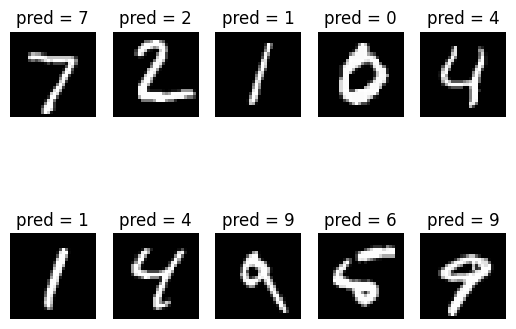

In [8]:
# Plot some predictions
fig, axes = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(test_x.iloc[i * 5 + j, :].values.reshape(28, 28), cmap='gray')
        axes[i, j].set_title('pred = ' + str(pred_y[i * 5 + j]))
        axes[i, j].axis('off')
plt.show()

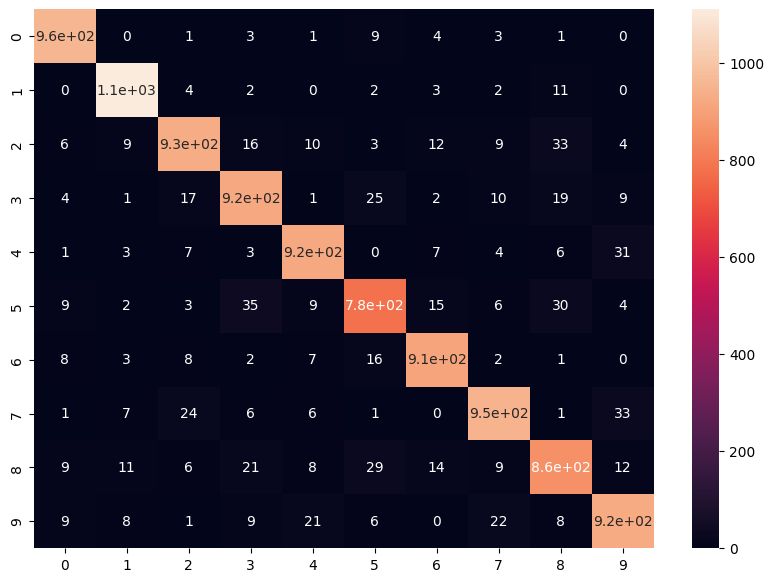

In [9]:
# Plot confusion matrix
cm = confusion_matrix(test_y, pred_y)
df_cm = pd.DataFrame(cm, index=range(10), columns=range(10))
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True)
plt.show()

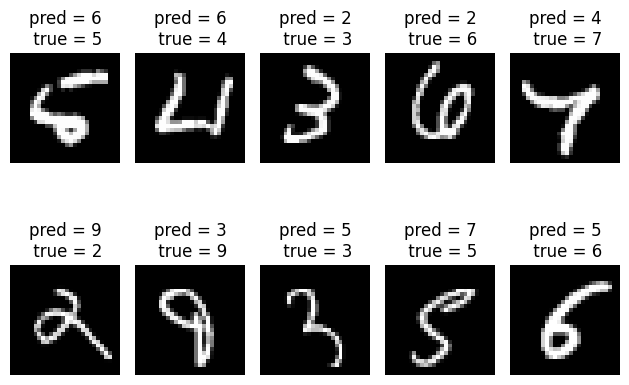

In [10]:
# Plot some misclassified samples and their true labels
misclassified = np.where(pred_y != test_y)[0]
fig, axes = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(test_x.iloc[misclassified[i * 5 + j], :].values.reshape(28, 28), cmap='gray')
        axes[i, j].set_title('pred = ' + str(pred_y[misclassified[i * 5 + j]]) + '\n true = ' + str(test_y.iloc[misclassified[i * 5 + j]]))
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

### Task 2

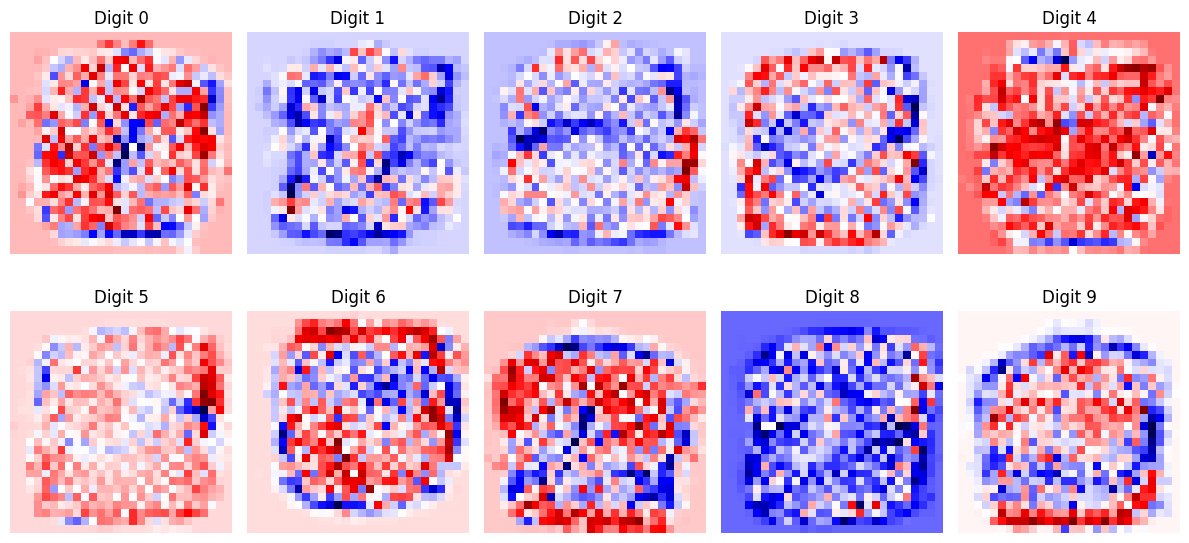

In [13]:
# Plot the logistic regression coefficients as images
coefs = model.coef_          # shape (10, 784) per classe 0–9
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(coefs[i].reshape(28, 28), cmap='seismic')
    ax.set_title(f'Digit {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()
